Link to Medium blog post: https://towardsdatascience.com/23-efficient-ways-of-subsetting-a-pandas-dataframe-6264b8000a77

# 23 Efficient Ways of Subsetting a Pandas DataFrame

## Pandas Series and DataFrame objects

A Series is one dimensional and a DataFrame is two dimensional. If we combine two or more Series objects together, we can get a DataFrame object. Let’s look at the actual view of a Series object.

In [1]:
import numpy as np
import pandas as pd
data = np.array([85, 90, 70, 80])
series = pd.Series(data=data, 
                   name="marks")
print(series)

0    85
1    90
2    70
3    80
Name: marks, dtype: int64


A Series consists of two components: One-dimensional data values and Index. The index provides meaningful labels for each data value. The users can use this index to select the values. By default, the index begins with 0.

Let’s look at the actual view of a DataFrame object.

In [2]:
import numpy as np
import pandas as pd
data = np.array([[25, 85],
                 [25, 90],
                 [26, 70],
                 [24, 80]])
dataframe = pd.DataFrame(data=data, 
                         columns=["age", "marks"])
print(dataframe)

   age  marks
0   25     85
1   25     90
2   26     70
3   24     80


A DataFrame consists of three components: Two-dimensional data values, Row index and Column index. These indices provide meaningful labels for rows and columns. The users can use these indices to select rows and columns. By default, the indices begin with 0.

Now, we discuss different ways of subsetting a Pandas DataFrame. For explaining purposes, I’ll use the “wine dataset”. Here is a part of it.

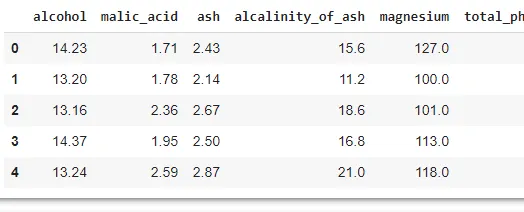

## Selection

When we grab the entire column(s), it refers to as Selection. The selected column(s) contain all the rows.

### Method 1: Selecting a single column using the column name

We can select a single column of a Pandas DataFrame using its column name. If the DataFrame is referred to as df, the general syntax is:

In [ ]:
df['column_name']
# Or
df.column_name # Only for single column selection

The output is a Pandas Series which is a single column!

In [4]:
# Load some data
import pandas as pd
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(data=wine.data,
                  columns=wine.feature_names)
# Select the 'alcohol column'
print(df['alcohol'])
print(type(df['alcohol']))

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64
<class 'pandas.core.series.Series'>


### Method 2: Selecting multiple columns using the column names

We can select multiple columns of a Pandas DataFrame using its column names. We can define columns names inside a list:

In [ ]:
['column_1', 'column_2', ...]

Then, we can include this list into df[]. The general syntax is:

In [ ]:
df[['column_1', 'column_2', ...]]

This time, the output is a Pandas DataFrame!



In [5]:
df[['alcohol', 'ash', 'hue']]

,alcohol,ash,hue
0,14.23,2.43,1.04
1,13.20,2.14,1.05
2,13.16,2.67,1.03
3,14.37,2.50,0.86
4,13.24,2.87,1.04
...,...,...,...
173,13.71,2.45,0.64
174,13.40,2.48,0.70
175,13.27,2.26,0.59
176,13.17,2.37,0.60


### Method 3: Selecting a single column using the .loc attribute

The same result in Method 1 can be obtained using the .loc attribute which selects Pandas data by label (column name).

In [6]:
df.loc[:, 'alcohol']

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

### Method 4: Selecting multiple columns using the .loc attribute

The same result in Method 2 can be obtained using the .loc attribute which selects Pandas data by labels (column names).

In [7]:
df.loc[:, ['alcohol', 'ash', 'hue']]

,alcohol,ash,hue
0,14.23,2.43,1.04
1,13.20,2.14,1.05
2,13.16,2.67,1.03
3,14.37,2.50,0.86
4,13.24,2.87,1.04
...,...,...,...
173,13.71,2.45,0.64
174,13.40,2.48,0.70
175,13.27,2.26,0.59
176,13.17,2.37,0.60


The general syntax of the .loc attribute is:

In [ ]:
df.loc['row_label', 'column_label']

If there are multiple labels, they should be specified inside lists:

In [ ]:
df.loc[['row_1', 'row_2'], 
       ['column_1', 'column_2']]

If we want to select all the rows or columns, it can be done with : symbol. The most important thing about the .loc attribute is that it selects Pandas data by label.

### Method 5: Selecting a single column using the .iloc attribute

The same result in Method 1 can be obtained using the .iloc attribute which selects Pandas data by position (column index).

In [9]:
df.iloc[:, 0]

0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 178, dtype: float64

The alcohol variable is in position 0 (first variable).

### Method 6: Selecting multiple columns using the .iloc attribute

The same result in Method 2 can be obtained using the .iloc attribute which selects Pandas data by positions (column indices).

In [10]:
df.iloc[:, [0, 2, 10]]

,alcohol,ash,hue
0,14.23,2.43,1.04
1,13.20,2.14,1.05
2,13.16,2.67,1.03
3,14.37,2.50,0.86
4,13.24,2.87,1.04
...,...,...,...
173,13.71,2.45,0.64
174,13.40,2.48,0.70
175,13.27,2.26,0.59
176,13.17,2.37,0.60


The general syntax of the .iloc attribute is:

In [ ]:
df.iloc['row_index', 'column_index']

If there are multiple labels, they should be specified inside lists:



In [ ]:
df.iloc[['row_index_1', 'row_index_2'], 
       ['column_index_1', 'column_index_2']]

If we want to select all the rows or columns, it can be done with : notation. The most important thing about the .iloc attribute is that it selects Pandas data by position using numeric indices.

### Method 7: Selecting consecutive columns using the .iloc attribute (The easy way)


We can select the first 5 columns of df as follows:

In [11]:
df.iloc[:, [0, 1, 2, 3, 4]]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium
0,14.23,1.71,2.43,15.6,127.0
1,13.20,1.78,2.14,11.2,100.0
2,13.16,2.36,2.67,18.6,101.0
3,14.37,1.95,2.50,16.8,113.0
4,13.24,2.59,2.87,21.0,118.0
...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0
174,13.40,3.91,2.48,23.0,102.0
175,13.27,4.28,2.26,20.0,120.0
176,13.17,2.59,2.37,20.0,120.0


We can also use the following easy method to obtain the same result.

In [12]:
df.iloc[:, 0:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium
0,14.23,1.71,2.43,15.6,127.0
1,13.20,1.78,2.14,11.2,100.0
2,13.16,2.36,2.67,18.6,101.0
3,14.37,1.95,2.50,16.8,113.0
4,13.24,2.59,2.87,21.0,118.0
...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0
174,13.40,3.91,2.48,23.0,102.0
175,13.27,4.28,2.26,20.0,120.0
176,13.17,2.59,2.37,20.0,120.0


To use this, columns should be positioned consecutively. The 0:5 range includes 0 (first column), excludes 5 (sixth column) and selects every column between the range.

### Method 8: Selecting the last column

Selecting the last column is often useful in many cases. There are two methods:

First, we can count the number of columns in the data frame using the .shape attribute.

In [13]:
df.shape
# Output: (178, 13)

(178, 13)

The last column is the 13th one that can be accessed through index 12. By using .iloc,

In [14]:
df.iloc[:, 12]

0      1065.0
1      1050.0
2      1185.0
3      1480.0
4       735.0
        ...  
173     740.0
174     750.0
175     835.0
176     840.0
177     560.0
Name: proline, Length: 178, dtype: float64

The second method is much easy. Here, we do not need to know the number of columns in the data frame.

In [15]:
df.iloc[:, -1]

0      1065.0
1      1050.0
2      1185.0
3      1480.0
4       735.0
        ...  
173     740.0
174     750.0
175     835.0
176     840.0
177     560.0
Name: proline, Length: 178, dtype: float64

The -1 represents the last column.

## Slicing

When we want to extract certain rows from the DataFrame, it refers to as Slicing. The extracted rows are called slices and contain all the columns.

### Method 9: Selecting a single row using the .iloc attribute

The easiest way to extract a single row is to use the row index inside the .iloc attribute. The general syntax is:

In [ ]:
df.iloc[row_index]

The output is a Pandas Series which contains the row values.

In [17]:
df.iloc[0]

alcohol                           14.23
malic_acid                         1.71
ash                                2.43
alcalinity_of_ash                 15.60
magnesium                        127.00
total_phenols                      2.80
flavanoids                         3.06
nonflavanoid_phenols               0.28
proanthocyanins                    2.29
color_intensity                    5.64
hue                                1.04
od280/od315_of_diluted_wines       3.92
proline                         1065.00
Name: 0, dtype: float64

The appearance is a bit confusing as the output is a Pandas Series. If you want this as a row itself, simply use the index values inside a list as follows:

In [18]:
df.iloc[[0]]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0


This is a Pandas DataFrame which contains 1 row and all the columns!

### Method 10: Selecting multiple rows using the .iloc attribute

We can extract multiple rows of a Pandas DataFrame using its row indices. We include row indices inside a list:

In [ ]:
[row_index_1, row_index_2, ...]

Then we include this list inside df.iloc[].

In [ ]:
df.iloc[[row_index_1, row_index_2, ...]]

The output is a Pandas DataFrame.

In [19]:
df.iloc[[0, 25, 100]]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
100,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0


### Method 11: Selecting the last few rows

The negative indices count rows from the bottom.

In [20]:
df.iloc[[-1, -2, -3, -4, -5]]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0


## Indexing

When we combine column selection and row slicing, it is referred to as Indexing. Here, we can use .loc and .iloc attributes of a Pandas DataFrame.

### Method 12: Selecting a single value using the .iloc attribute

If we specify a single row and a single column, the intersection is a single value!



In [21]:
df.iloc[0, 0]


14.23

Keep in mind that we cannot use column or row names inside .iloc[]. Only the index numbers can be used.

### Method 13: Selecting a single value using the .loc attribute

Here we can use row or column names inside .loc[]. Also keep in mind that, in our data, the row labels are the same as the row indices. The following code gives the same result as in Method 12.

In [22]:
df.loc[0, 'alcohol']

14.23

### Method 14: Selecting multiple rows and columns using the .iloc attribute

The general syntax is:

In [ ]:
df.iloc[[row_index_1, row_index_2, ...],
        [column_index_1, column_index_2, ...]]

The output is a Pandas DataFrame.

In [23]:
df.iloc[[0, 5, 100], [0, 3, 7]]

,alcohol,alcalinity_of_ash,nonflavanoid_phenols
0,14.23,15.6,0.28
5,14.20,15.2,0.34
100,12.08,17.5,0.26


### Method 15: Selecting multiple rows and columns using the .loc attribute

The general syntax is:

In [ ]:
df.loc[[row_name, row_name_2, ...],
        [column_name_1, column_name_2, ...]]

The output is a Pandas DataFrame.

In [24]:
df.loc[[0, 5, 100], ['alcohol', 'ash', 'hue']]

,alcohol,ash,hue
0,14.23,2.43,1.04
5,14.20,2.45,1.05
100,12.08,1.70,1.27


Here we can use row or column names inside .loc[]. Also keep in mind that, in our data, the row names are the same as the row indices.

### Method 16: Selecting consecutive rows and columns using the .loc and .iloc attributes (The easy way)

This can be easily done with the : notation. For this, rows and columns should be positioned consecutively.

In [25]:
df.iloc[0:6, 0:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium
0,14.23,1.71,2.43,15.6,127.0
1,13.20,1.78,2.14,11.2,100.0
2,13.16,2.36,2.67,18.6,101.0
3,14.37,1.95,2.50,16.8,113.0
4,13.24,2.59,2.87,21.0,118.0
5,14.20,1.76,2.45,15.2,112.0


Another example is:

In [26]:
df.loc[0:6, ['alcohol', 'ash']]

,alcohol,ash
0,14.23,2.43
1,13.20,2.14
2,13.16,2.67
3,14.37,2.50
4,13.24,2.87
5,14.20,2.45
6,14.39,2.45


## Filtering

When we select rows and columns based on specific criteria or conditions, it is referred to as Filtering. We can also combine the above-discussed methods with this.

### Method 17: Filtering based on a single criterion with all columns

Let’s subset our data when alcohol > 14.3. Here, we select all the columns when alcohol > 14.3.

In [27]:
df['alcohol'] > 14.3

0      False
1      False
2      False
3       True
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: alcohol, Length: 178, dtype: bool

This is a Pandas Series of boolean data type. We can use this Series to get the required subset of the data.

In [28]:
df[df['alcohol'] > 14.3]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0


### Method 18: Filtering based on a single criterion with a few columns

Let’s subset our data when alcohol > 14.3. This time, we select only 3 columns when alcohol > 14.3. For this, we can combine the above filtering technique with .loc[].

In [29]:
df.loc[df['alcohol'] > 14.3, 
      ['alcohol', 'ash', 'hue']]

,alcohol,ash,hue
3,14.37,2.50,0.86
6,14.39,2.45,1.02
8,14.83,2.17,1.08
13,14.75,2.39,1.25
14,14.38,2.38,1.20
46,14.38,2.28,1.04
158,14.34,2.70,0.57


### Method 19: Filtering based on two criteria with AND operator (Same column)

Let’s subset our data when alcohol > 14.3 AND alcohol < 14.6. Here, we use two conditions and combine them with the AND operator. Each condition should be surrounded in parentheses.

In [30]:
df[(df['alcohol'] > 14.3) & (df['alcohol'] < 14.6)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0


### Method 20: Filtering based on two criteria with the between() method

A similar type of filtering discussed in Method 19 can be achieved using the between() method.

In [31]:
df[df['alcohol'].between(14.3, 14.6)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0


Here, the output is a bit different because the between() method includes the values of the lower bound (14.3) and upper bound (14.6) by default. However, we can pass inclusive=False if we don’t want the inclusive selection.

In [ ]:
df[df['alcohol'].between(14.3, 14.6,
                         inclusive=False)]

This subset is exactly the same as the subset obtained in Method 19.

### Method 21: Filtering based on two criteria with AND operator (Different columns)


Here, the two conditions are made using two different columns: alcohol and hue.

In [33]:
df[(df['alcohol'] > 14.3) & (df['hue'] > 1.0)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
46,14.38,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065.0


### Method 22: Filtering based on two criteria with OR operator

When we use the AND operator, the filtering happens considering both conditions to be true. If we want at least one condition to be true, we can use the OR operator.



In [34]:
df[(df['alcohol'] > 14.5) | (df['hue'] > 1.4)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0
64,12.17,1.45,2.53,19.0,104.0,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355.0
99,12.29,3.17,2.21,18.0,88.0,2.85,2.99,0.45,2.81,2.30,1.42,2.83,406.0
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0


### Method 23: Filtering based on the minimum and maximum values

Let’s subset our data based on the minimum and maximum values of the alcohol variable. First, we get the indices of the minimum and maximum:

In [35]:
df['alcohol'].idxmin() # Min value index
df['alcohol'].idxmax() # Max value index

8

Then we use .iloc[].

In [36]:
df.iloc[[df['alcohol'].idxmin(),
         df['alcohol'].idxmax()]]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.2,1.08,2.85,1045.0
